# Taller - Importando el Mundo: Visualización y Conversión de Formatos 3D

## Objetivo
Comparar y convertir entre distintos formatos de modelos 3D: `.OBJ`, `.STL` y `.GLTF`, y visualizar sus diferencias en geometría y propiedades. Entender la estructura interna de los archivos 3D y su compatibilidad entre entornos.

## 1. Instalación Automática de Dependencias

In [1]:
import subprocess
import sys

# Instalar dependencias automáticamente
libraries = ['trimesh', 'numpy', 'matplotlib']

for lib in libraries:
    try:
        __import__(lib)
        print(f"✓ {lib} ya está instalado")
    except ImportError:
        print(f"Instalando {lib}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", lib, "-q"])
        print(f"✓ {lib} instalado correctamente")

print("\n✅ Todas las dependencias están listas!")

✓ trimesh ya está instalado
✓ numpy ya está instalado
✓ matplotlib ya está instalado

✅ Todas las dependencias están listas!


## 2. Importar Librerías Necesarias

In [2]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
import os

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


## 3. Preparación: Generación de Modelos 3D Genéricos
Vamos a crear algorítmicamente un modelo 3D (un Torus o Dona) y lo exportaremos temporalmente a `.OBJ`, `.STL` y `.GLTF` para tener archivos base sobre los cuales hacer nuestras comparaciones de formatos.

In [3]:
# Asegurar que existe la carpeta para modelos
os.makedirs('../models', exist_ok=True)

# Crear un modelo genérico: Una dona (Torus)
print("Generando modelo genérico (Torus)...")
mesh = trimesh.creation.torus(major_radius=2.0, minor_radius=0.5, major_sections=32, minor_sections=16)

# Rutas de exportación
archivos = {
    'OBJ': '../models/generic_model.obj',
    'STL': '../models/generic_model.stl',
    'GLTF': '../models/generic_model.gltf'
}

# Exportar en los tres formatos
for fmt, path in archivos.items():
    mesh.export(path)
    print(f"✓ Exportado exitosamente a formato {fmt}: {path}")

Generando modelo genérico (Torus)...
✓ Exportado exitosamente a formato OBJ: ../models/generic_model.obj
✓ Exportado exitosamente a formato STL: ../models/generic_model.stl
✓ Exportado exitosamente a formato GLTF: ../models/generic_model.gltf


## 4. Análisis y Comparación Estructural
Aquí cargaremos de nuevo los tres modelos guardados y compararemos estadísticamente la integridad de cada formato:
- Cantidad de vértices y caras (triángulos).
- Si soporta y trae incluidas **Normales de Vértices** o **Normales de Caras**.
- Si al exportar se generaron **Vértices Duplicados** (muy común en formatos como STL).

In [4]:
def analyze_model(filepath):
    print(f"\n{'-'*50}")
    print(f"Analizando: {os.path.basename(filepath)}")
    print(f"{'-'*50}")
    
    try:
        # Cargar el modelo asegurando que sea tratado como malla
        m = trimesh.load(filepath, force='mesh')
        
        num_vertices = len(m.vertices)
        num_faces = len(m.faces)
        
        has_vertex_normals = 'vertex_normals' in m.visual.__dict__ or hasattr(m, 'vertex_normals')
        has_face_normals = hasattr(m, 'face_normals')
        
        unique_vertices = len(np.unique(m.vertices, axis=0))
        duplicados = num_vertices - unique_vertices
        
        print(f"🔹 Vértices totales: {num_vertices:,}")
        print(f"🔹 Vértices duplicados: {duplicados}")
        print(f"🔹 Caras: {num_faces:,}")
        print(f"🔹 Normales de Vértice: {'Sí' if has_vertex_normals else 'No'}")
        print(f"🔹 Normales de Cara: {'Sí' if has_face_normals else 'No'}")
        print(f"🔹 Es Watertight (Cerrado): {'Sí' if m.is_watertight else 'No'}")
        
        return m
        
    except Exception as e:
        print(f"Error cargando {filepath}: {e}")
        return None

meshes = []
for fmt, path in archivos.items():
    if os.path.exists(path):
        meshes.append(analyze_model(path))


--------------------------------------------------
Analizando: generic_model.obj
--------------------------------------------------
🔹 Vértices totales: 512
🔹 Vértices duplicados: 0
🔹 Caras: 1,024
🔹 Normales de Vértice: Sí
🔹 Normales de Cara: Sí
🔹 Es Watertight (Cerrado): Sí

--------------------------------------------------
Analizando: generic_model.stl
--------------------------------------------------
🔹 Vértices totales: 512
🔹 Vértices duplicados: 0
🔹 Caras: 1,024
🔹 Normales de Vértice: Sí
🔹 Normales de Cara: Sí
🔹 Es Watertight (Cerrado): Sí

--------------------------------------------------
Analizando: generic_model.gltf
--------------------------------------------------
🔹 Vértices totales: 512
🔹 Vértices duplicados: 0
🔹 Caras: 1,024
🔹 Normales de Vértice: Sí
🔹 Normales de Cara: Sí
🔹 Es Watertight (Cerrado): Sí


## 5. Conversión de Formatos (Trimesh Exchange)
Trimesh provee capacidades de interoperabilidad. Como bonus, podemos cargar el formato `OBJ` original y exportarlo a un cuarto formato, por ejemplo `.PLY`, muy utilizado para escaners láser y nubes de puntos 3D.

In [5]:
base_mesh = meshes[0] # Usamos el primer modelo cargado internamente (el OBJ)
        
export_ply = '../models/converted_model.ply'
print(f"Exportando formato original a PLY: {export_ply}")
base_mesh.export(export_ply)

# Comprobar que realmente existe el archivo
if os.path.exists(export_ply):
    print("¡Conversión y guardado del archivo PLY exitoso!")

Exportando formato original a PLY: ../models/converted_model.ply
¡Conversión y guardado del archivo PLY exitoso!


## 6. Visualización 3D en Matplotlib
Generamos una gráfica estática para visualizar las nubes de puntos cargadas desde los modelos 3D y comprobar visualmente que la geometría base es consistente entre los tres formatos primarios (`OBJ`, `STL` y `GLTF`).

Generando visualización comparativa de las mallas...


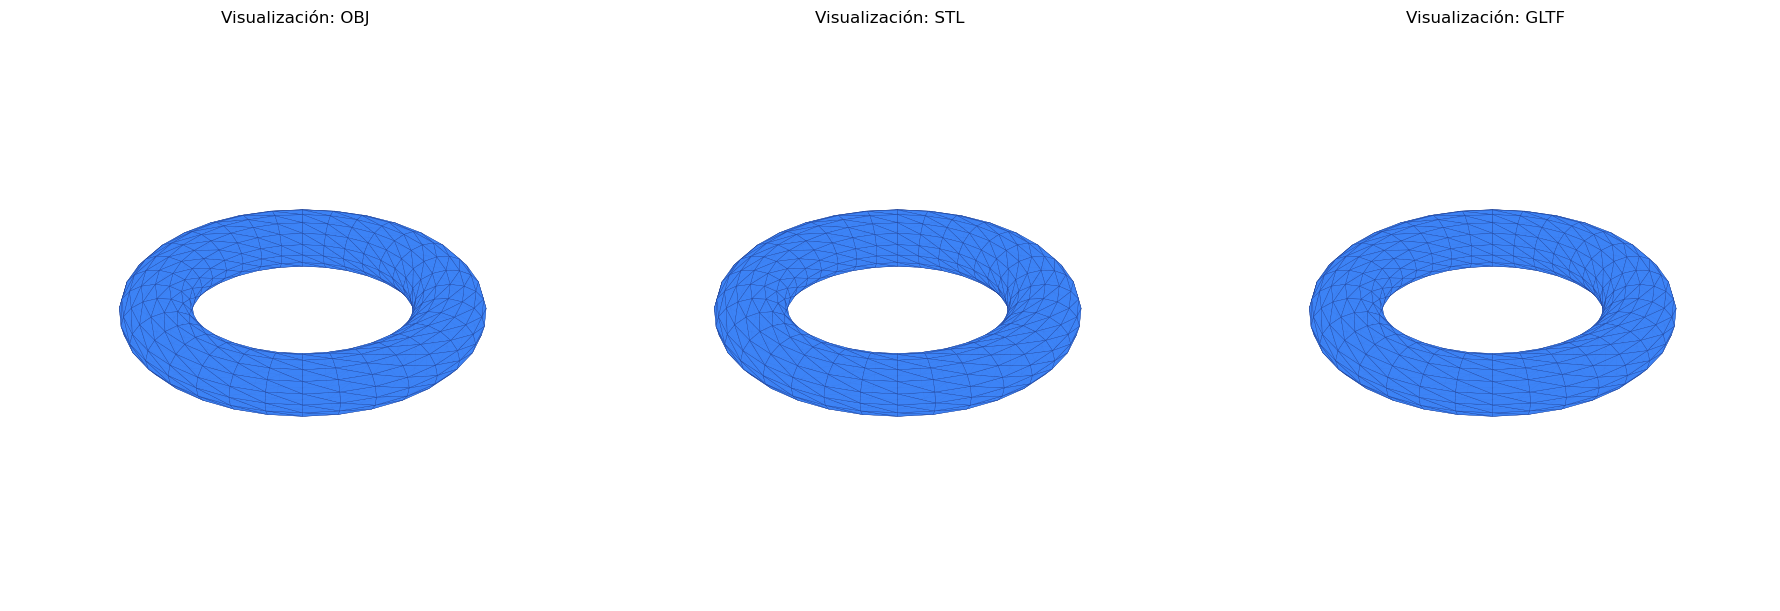

In [6]:
print("Generando visualización comparativa de las mallas...")

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure(figsize=(18, 6))
nombres = ['OBJ', 'STL', 'GLTF']
        
for i, (m, title) in enumerate(zip(meshes, nombres)):
    if m is None:
        continue
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    ax.set_title(f"Visualización: {title}")
    
    # Dibujar modelo 3D usando sus caras y vértices
    # Utilizamos colores sólidos y bordes oscuros para que se note la estructura 3D claramente
    poly_collection = Poly3DCollection([m.vertices[face] for face in m.faces], alpha=0.9, facecolor='#3b82f6', edgecolor='#1e3a8a', linewidths=0.2)
    ax.add_collection3d(poly_collection)
    
    # Calcular límites de la malla para centrar la cámara
    bounds = m.bounds
    center = m.center_mass if m.is_watertight else m.centroid
    max_range = (bounds[1] - bounds[0]).max() / 2.0

    mid_x = (bounds[1][0] + bounds[0][0]) * 0.5
    mid_y = (bounds[1][1] + bounds[0][1]) * 0.5
    mid_z = (bounds[1][2] + bounds[0][2]) * 0.5
    
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)
    
    # Ángulo de vista
    ax.view_init(elev=30, azim=45)
    
    # Limpiamos los ejes
    ax.set_axis_off()
    
plt.tight_layout()
plt.show()